# **DATASET GENERATION**

Range to generate true weights is [-2,2] because a larger magnitude will lead to the logit score being high in magnitude, which will lean sharply towards 0 or 1. So the uncertainty factor is reduced, this is easy for the model. Our range encapsulates that uncertainty well.
Even for feature generation the range we used is -5,5 because of the same reason. Too small of a value will negligibly change the logit, too big might explode the logit values.

In [138]:
import numpy as np
import pandas as pd

#SAME AS ABOVE CODE BUT MORE STRUCTURED USING PANDAS



#set random seed
np.random.seed(42)

#parameters
n_samples = 100000
n_features = 10

#Generate theta_true (ground-truth weights)
theta_true = np.random.uniform(-2, 2, (n_features, 1))
print("✅ theta_true (shape:", theta_true.shape, "):\n", theta_true)
theta_true_df=pd.DataFrame(theta_true, columns=["Components/features"])   #convert it to a dataframe using pandas
print(theta_true_df.head())

#Generate feature matrix X
X = np.random.uniform(-5, 5, (n_samples, n_features))
print("\n✅ X (shape:", X.shape, "):")
X_df=pd.DataFrame(X, columns=[f"x{i}" for i in range(n_features)])    #convert to dataframe, with each feature's name as Xi
print(X_df.head())

#Compute logits
logits = X @ theta_true  #matrix multiplication using numpy
print("\n✅ logits (shape:", logits.shape, "):")
logits_df=pd.DataFrame(logits, columns=["logit"]) #again, make a dataframe of logits
print(logits_df.head())

#Compute probabilities using sigmoid
probs = 1 / (1 + np.exp(-logits))
print("\n✅ probabilities (shape:", probs.shape, "):")
probabilities_df=pd.DataFrame(probs, columns=["probability"])   #dataframe them
print(probabilities_df.head())

#Sample y from Bernoulli distribution
y = (np.random.rand(n_samples, 1) < probs).astype(int)
print("\n✅ y labels (shape:", y.shape, "):")
y_df=pd.DataFrame(y, columns=["y"])
print(y_df.head())

#Combine probabilities and labels into one DataFrame
probs_y_df = pd.DataFrame({
    "probability": probs.flatten(),
    "y": y.flatten()
})

#Show first few rows
print("✅ Combined probabilities and y DataFrame:")
print(probs_y_df.head())

#Show all columns and increase line width
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)

✅ theta_true (shape: (10, 1) ):
 [[-0.50183952]
 [ 1.80285723]
 [ 0.92797577]
 [ 0.39463394]
 [-1.37592544]
 [-1.37602192]
 [-1.76766555]
 [ 1.46470458]
 [ 0.40446005]
 [ 0.83229031]]
   Components/features
0            -0.501840
1             1.802857
2             0.927976
3             0.394634
4            -1.375925

✅ X (shape: (100000, 10) ):
         x0        x1        x2        x3       x4        x5        x6        x7        x8        x9
0 -4.794155  4.699099  3.324426 -2.876609 -3.18175 -3.165955 -1.957578  0.247564 -0.680550 -2.087709
1  1.118529 -3.605061 -2.078554 -1.336382 -0.43930  2.851760 -3.003262  0.142344  0.924146 -4.535496
2  1.075449 -3.294759 -4.349484  4.488855  4.65632  3.083973 -1.953862 -4.023279  1.842330 -0.598475
3 -3.779618 -0.048231 -4.656115  4.093204 -2.41220  1.625223 -1.882889  0.200680  0.467103 -3.151455
4  4.695846  2.751328  4.394989  3.948274  0.97900  4.218742 -4.115075 -3.040171 -4.547727 -1.746697

✅ logits (shape: (100000, 1) ):
       log

**Adding  noise**

In [140]:
import pandas as pd
import numpy as np

# Add noise to X and y, return DataFrames
def add_noise_to_dataset(X, y, x_noise_std=0.01, y_flip_ratio=0.005, seed=42):
    np.random.seed(seed)

    # Add Gaussian noise to X
    X_noisy = X + np.random.normal(0, x_noise_std, X.shape)

    # Flip a percentage of y labels (simulate label noise)
    y_noisy = y.copy()
    n_flips = int(len(y) * y_flip_ratio)
    flip_indices = np.random.choice(len(y), n_flips, replace=False)
    y_noisy[flip_indices] = 1 - y_noisy[flip_indices]

    # Convert to DataFrames
    X_df = pd.DataFrame(X_noisy, columns=[f"x{i}" for i in range(X.shape[1])])
    y_df = pd.DataFrame(y_noisy, columns=["label"])

    return X_df, y_df,X_noisy,y_noisy

# Example usage
X_noisy_df, y_noisy_df,X_noisy,y_noisy = add_noise_to_dataset(X, y)

# Display the first few rows
print("X noisy DataFrame:\n", X_noisy_df.head())
print("\ny noisy DataFrame:\n", y_noisy_df.head())


X noisy DataFrame:
          x0        x1        x2        x3        x4        x5        x6        x7        x8        x9
0 -4.789188  4.697716  3.330903 -2.861379 -3.184092 -3.168296 -1.941785  0.255239 -0.685245 -2.082283
1  1.113895 -3.609719 -2.076134 -1.355514 -0.456549  2.846137 -3.013390  0.145487  0.915065 -4.549619
2  1.090105 -3.297017 -4.348809  4.474608  4.650877  3.085083 -1.965372 -4.019522  1.836324 -0.601392
3 -3.785635 -0.029708 -4.656250  4.082627 -2.403975  1.613014 -1.880801  0.181084  0.453821 -3.149487
4  4.703231  2.753042  4.393833  3.945262  0.964215  4.211544 -4.119681 -3.029600 -4.544291 -1.764327

y noisy DataFrame:
    label
0      1
1      0
2      0
3      1
4      1


In [139]:
True_Weight=theta_true
print(True_Weight)

[[-0.50183952]
 [ 1.80285723]
 [ 0.92797577]
 [ 0.39463394]
 [-1.37592544]
 [-1.37602192]
 [-1.76766555]
 [ 1.46470458]
 [ 0.40446005]
 [ 0.83229031]]


In [ ]:
from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

In [ ]:
directory = '/content/drive/My Drive/OELP_Sem4/Dataset'

#Save your DataFrame as a CSV file in the directory
probs_y_df.to_csv(f'{directory}/probs_y_df.csv', index=False)
X_df.to_csv(f'{directory}/X_df.csv', index=False)
logits_df.to_csv(f'{directory}/logits_df.csv', index=False)
theta_true_df.to_csv(f'{directory}/theta_true_df.csv', index=False)


print("File saved successfully to Google Drive!")


# **LOGISTIC REGRESSION MODEL**

In [150]:
import numpy as np

n_samples, n_features = X.shape # dimensions of the inputs(ie vextor X) here we have 100000 samples and 10 features.
theta = np.zeros((n_features, 1))  # initial theta is array of 10 zeros. [column vector]

In [151]:
def sigmoid(z): #sigmoid function which is the logistic rgeression model's main function (activation function)
    return 1 / (1 + np.exp(-z))

In [152]:
def predict_probs(X, theta):
    logits = X @ theta  # (n_samples, 1)
    return sigmoid(logits)  # probabilities that are predicted.

**LOGLOSS FUNCTION**

In [153]:
def log_loss(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) #lower and upper bounding
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) #logloss function
    return loss

In [154]:
def compute_gradient(X, y_true, y_pred):
    grad=(X.T @ (y_pred - y_true)) / len(y_true)
    return grad
    #x.t means transpose of x
    #final shape - (n_features, 1)

In [155]:
def update_theta(theta, grad, lr=0.01):
    return theta - lr * grad
  #lr - learning rate

**TRAINING**

In [156]:
#TRAIN FOR FIXED ITERATIONS
def train(X, y, lr=0.1, epochs=500):
    y = y.reshape(-1, 1)  # ensure it's a column vector
    losses = []
    n_samples, n_features = X.shape # dimensions of the inputs(ie vextor X) here we have 100000 samoples and 10 features.
    theta = np.zeros((n_features, 1))  # initial assumed theta (weights) is array of 10 zeros. [column vector]
    for epoch in range(epochs):
        y_pred = predict_probs(X, theta)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)
        theta = update_theta(theta, grad, lr)

        losses.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")
            print(f"Theta({epoch}: )")
            print(theta)

    return theta, losses


In [159]:
theta_final_fixed_iter, losslist_fixed_iter = train(X_noisy,y_noisy)

Epoch 0, Loss: 0.693147
Theta(0: )
[[-0.01456914]
 [ 0.05506184]
 [ 0.02748486]
 [ 0.01107983]
 [-0.0409738 ]
 [-0.04009578]
 [-0.05417198]
 [ 0.04302011]
 [ 0.01173464]
 [ 0.02336215]]
Epoch 10, Loss: 0.312238
Theta(10: )
[[-0.08054694]
 [ 0.30074371]
 [ 0.15164806]
 [ 0.06162112]
 [-0.2250432 ]
 [-0.22214394]
 [-0.29611082]
 [ 0.23751903]
 [ 0.06585499]
 [ 0.13194383]]
Epoch 20, Loss: 0.253222
Theta(20: )
[[-0.11128968]
 [ 0.41048452]
 [ 0.20875853]
 [ 0.08523887]
 [-0.30875806]
 [-0.30556834]
 [-0.40405048]
 [ 0.32626646]
 [ 0.09089259]
 [ 0.18325419]]
Epoch 30, Loss: 0.226893
Theta(30: )
[[-0.132463  ]
 [ 0.48508216]
 [ 0.2478851 ]
 [ 0.10152584]
 [-0.36596564]
 [-0.36258694]
 [-0.47734381]
 [ 0.38697033]
 [ 0.10797744]
 [ 0.21861396]]
Epoch 40, Loss: 0.211479
Theta(40: )
[[-0.1488355 ]
 [ 0.54258665]
 [ 0.27808771]
 [ 0.11413683]
 [-0.41011878]
 [-0.40656354]
 [-0.53380553]
 [ 0.43385894]
 [ 0.12112222]
 [ 0.24594555]]
Epoch 50, Loss: 0.201210
Theta(50: )
[[-0.16225989]
 [ 0.58973

In [157]:

#TRAIN UNTIL SECOND ORDER DIFFERENCE UNDER A THRESHOLD
#this checks difference of change in gradient

def train_with_second_diff(X, y, lr=0.1, max_epochs=5000, tol=1e-9):
    y = y.reshape(-1, 1)
    losses = []
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))

    prev_grad = np.zeros_like(theta)
    prev_prev_grad = np.zeros_like(theta)

    for epoch in range(max_epochs):
        y_pred = predict_probs(X, theta)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        #Update weights
        theta = update_theta(theta, grad, lr)
        losses.append(loss)

        #Print every 10 steps
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

        #Only compute second diff after first 2 steps
        if epoch >= 2:
            second_diff = np.linalg.norm(grad - 2 * prev_grad + prev_prev_grad)     #this is |(curr_grad-prev_grad) - (prev_grad - prev_prev_grad)|
            if second_diff < tol:
                print(f"Converged at epoch {epoch} with 2nd-order grad diff < {tol}")
                break

        # Update stored gradients for next step
        prev_prev_grad = prev_grad
        prev_grad = grad

    return theta, losses, epoch


In [160]:
theta_final_2d, losslist_2d, epochs_2d = train_with_second_diff(X_noisy,y_noisy)

Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.312238
Epoch 20, Loss: 0.253222
Epoch 30, Loss: 0.226893
Epoch 40, Loss: 0.211479
Epoch 50, Loss: 0.201210
Epoch 60, Loss: 0.193826
Epoch 70, Loss: 0.188240
Epoch 80, Loss: 0.183860
Epoch 90, Loss: 0.180331
Epoch 100, Loss: 0.177428
Epoch 110, Loss: 0.174999
Epoch 120, Loss: 0.172938
Epoch 130, Loss: 0.171171
Epoch 140, Loss: 0.169639
Epoch 150, Loss: 0.168300
Epoch 160, Loss: 0.167123
Epoch 170, Loss: 0.166080
Epoch 180, Loss: 0.165151
Epoch 190, Loss: 0.164319
Epoch 200, Loss: 0.163572
Epoch 210, Loss: 0.162897
Epoch 220, Loss: 0.162286
Epoch 230, Loss: 0.161731
Epoch 240, Loss: 0.161225
Epoch 250, Loss: 0.160762
Epoch 260, Loss: 0.160338
Epoch 270, Loss: 0.159948
Epoch 280, Loss: 0.159590
Epoch 290, Loss: 0.159259
Epoch 300, Loss: 0.158953
Epoch 310, Loss: 0.158670
Epoch 320, Loss: 0.158408
Epoch 330, Loss: 0.158164
Epoch 340, Loss: 0.157937
Epoch 350, Loss: 0.157726
Epoch 360, Loss: 0.157529
Epoch 370, Loss: 0.157345
Epoch 380, Loss: 0.1571

In [158]:

#TRAIN UNTIL SECOND ORDER DIFFERENCE UNDER A THRESHOLD
#this checks difference of change in gradient

def train_with_second_diff_and_loss_change(X, y, lr=0.1, max_epochs=5000, tol=1e-9):
    y = y.reshape(-1, 1)
    losses = []
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))

    prev_loss = None

    prev_grad = np.zeros_like(theta)
    prev_prev_grad = np.zeros_like(theta)

    for epoch in range(max_epochs):
        y_pred = predict_probs(X, theta)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        #Update weights
        theta = update_theta(theta, grad, lr)
        losses.append(loss)

        #Print every 10 steps
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

        #Only compute second diff after first 2 steps
        if epoch >= 2 and prev_loss is not None:
            second_diff = np.linalg.norm(grad - 2 * prev_grad + prev_prev_grad)     #this is |(curr_grad-prev_grad) - (prev_grad - prev_prev_grad)|
            if abs(loss - prev_loss) < 1e-6:
              stagnant_steps += 1
            else:
              stagnant_steps = 0

            if stagnant_steps >= 50 or second_diff < tol:
              print(f"Converged at epoch {epoch} with 2nd-order grad diff and log loss change method")
              break


        # Update stored gradients for next step
        prev_prev_grad = prev_grad
        prev_grad = grad
        prev_loss = loss

    return theta, losses, epoch


In [161]:
theta_final_2d_loss_change, losslist_2d_loss_change, epochs_2d_loss_change = train_with_second_diff_and_loss_change(X_noisy,y_noisy)

Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.312238
Epoch 20, Loss: 0.253222
Epoch 30, Loss: 0.226893
Epoch 40, Loss: 0.211479
Epoch 50, Loss: 0.201210
Epoch 60, Loss: 0.193826
Epoch 70, Loss: 0.188240
Epoch 80, Loss: 0.183860
Epoch 90, Loss: 0.180331
Epoch 100, Loss: 0.177428
Epoch 110, Loss: 0.174999
Epoch 120, Loss: 0.172938
Epoch 130, Loss: 0.171171
Epoch 140, Loss: 0.169639
Epoch 150, Loss: 0.168300
Epoch 160, Loss: 0.167123
Epoch 170, Loss: 0.166080
Epoch 180, Loss: 0.165151
Epoch 190, Loss: 0.164319
Epoch 200, Loss: 0.163572
Epoch 210, Loss: 0.162897
Epoch 220, Loss: 0.162286
Epoch 230, Loss: 0.161731
Epoch 240, Loss: 0.161225
Epoch 250, Loss: 0.160762
Epoch 260, Loss: 0.160338
Epoch 270, Loss: 0.159948
Epoch 280, Loss: 0.159590
Epoch 290, Loss: 0.159259
Epoch 300, Loss: 0.158953
Epoch 310, Loss: 0.158670
Epoch 320, Loss: 0.158408
Epoch 330, Loss: 0.158164
Epoch 340, Loss: 0.157937
Epoch 350, Loss: 0.157726
Epoch 360, Loss: 0.157529
Epoch 370, Loss: 0.157345
Epoch 380, Loss: 0.1571

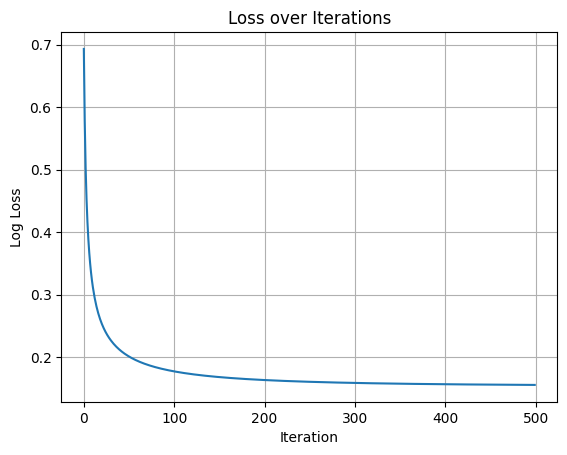

In [162]:
import matplotlib.pyplot as plt

plt.plot(losslist_fixed_iter)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


NOTICE the graph still seems to be going down, meaning we have probably not reached convergence yet, that means we should try another way to converge.

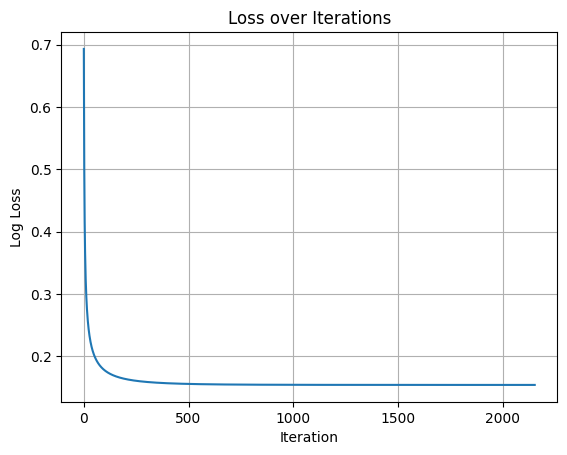

In [163]:
import matplotlib.pyplot as plt

plt.plot(losslist_2d)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


NOTICE THAT - Log loss is BARELY changing after about 800 iterations, we are doing 2000 more after that. This means our computing is becoming redundant after some point, so solely relying on second order difference of gradients may not be a good idea in terms of resource saving.

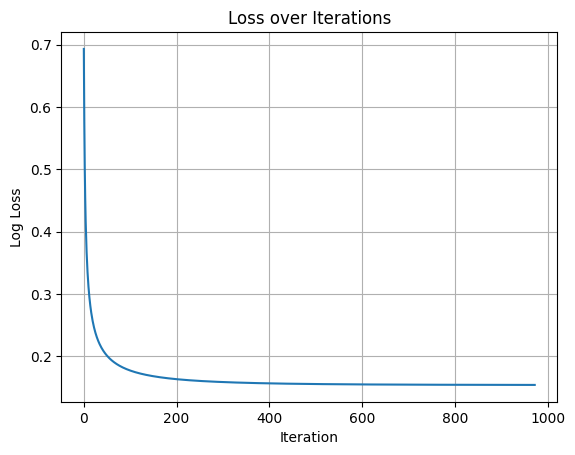

In [164]:
import matplotlib.pyplot as plt

plt.plot(losslist_2d_loss_change)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


Successfully reduced about 1000 iterations which is good to save computing resources compared to only using second difference of gradient. Again it all depends on threshold we pick, but these are the general values we want if we want a good approximation.

In [165]:
error_fixed = theta_final_fixed_iter - theta_true.reshape(-1, 1)
l2_norm_fixed = np.linalg.norm(error_fixed)
print("L2 norm of error vector using fixed iterations training model:", l2_norm_fixed)

error_2d = theta_final_2d - theta_true.reshape(-1, 1)
l2_norm_2d = np.linalg.norm(error_2d)
print("L2 norm of error vector using second difference gradient model:", l2_norm_2d)

error_2d_logloss_change = theta_final_2d_loss_change - theta_true.reshape(-1, 1)
l2_norm_2d_logloss_change = np.linalg.norm(error_2d_logloss_change)
print("L2 norm of error vector using second difference gradient + log loss change model:", l2_norm_2d_logloss_change)
#print("Difference between the true value and predicted weights is:")
#print((True_Weight-theta_final_fixed_iter))

L2 norm of error vector using fixed iterations training model: 1.4046550317743454
L2 norm of error vector using second difference gradient model: 1.0344298711850493
L2 norm of error vector using second difference gradient + log loss change model: 1.1600481920360002


You can compare the difference between the weights we found and the actual weights clearly here

# **QUANTIZED GRADIENT DESCENT STATIC**

In [166]:
def encode_gradient(gradient, bit_alloc):
    encoded_bits = ''
    for g, bits in zip(gradient, bit_alloc):
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        q_index = int(round((g + 1) / step_size))  # Find the quantized index
        q_index = min(num_levels - 1, max(0, q_index))  # Clip index to be within bounds
        bin_str = format(q_index, f'0{bits}b')  # Convert index to binary string
        encoded_bits += bin_str  # Concatenate to form final encoded string
    return encoded_bits

# Decoding Function: Convert the encoded gradient back
def decode_gradient(encoded_bits, bit_alloc):
    decoded_grad = []
    idx = 0
    for bits in bit_alloc:
        seg = encoded_bits[idx:idx + bits]
        idx += bits
        q_index = int(seg, 2)  # Convert binary string back to integer
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        val = -1 + q_index * step_size + (step_size / 2.0)  # Decode back to original value
        decoded_grad.append(val)
    return decoded_grad


def train_with_quantization(X, y, lr=0.1, max_epochs=5000, tol=1e-9, bit_alloc=None):
    y = y.reshape(-1, 1)
    losses = []

    n_samples, n_features = X.shape
    theta_client = np.zeros((n_features, 1))  # Client's theta
    theta_server = np.zeros((n_features, 1))  # Server's theta

    prev_grad = np.zeros_like(theta_client)   #initialize as all zeroes
    prev_prev_grad = np.zeros_like(theta_client)
    prev_loss = None    #so that we dont compute change in log loss in the first iteration
    stagnant_steps = 0

    for epoch in range(max_epochs):
        # Client-side: predict, compute gradient
        y_pred = predict_probs(X, theta_client)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        # Quantize and encode the gradient (flatten to 1D)
        encoded = encode_gradient(grad.flatten(), bit_alloc)

        # Simulate transmission to server (bit_alloc + encoded)
        # Server decodes
        decoded_grad = np.array(decode_gradient(encoded, bit_alloc)).reshape(-1, 1)

        # Server updates theta
        theta_server = update_theta(theta_server, decoded_grad, lr)

        # Client also updates theta (for consistency)
        theta_client = update_theta(theta_client, decoded_grad, lr)

        # Track loss
        losses.append(loss)

        # Print every 10 epochs
        if epoch % 1 == 0 and prev_loss is not None:
            print(f"Epoch {epoch}, Loss: {loss:.9f}, Prev_loss: {prev_loss:.9f}")

        # Convergence check
        if epoch >= 2 and prev_loss is not None:
            second_diff = np.linalg.norm(decoded_grad - 2 * prev_grad + prev_prev_grad)
            if abs(loss - prev_loss) < 1e-3:
                stagnant_steps += 1
                print("stagnant", stagnant_steps)
            else:
                #print("reset!")
                stagnant_steps = 0

            if stagnant_steps >= 50 or second_diff < tol:
              if stagnant_steps >= 50:
                print("Log loss stagnant")
              else:
                print("Difference in difference of gradient threshold reached ")

              print(f"Converged at epoch {epoch}")
              break

        # Update previous gradients and loss
        prev_prev_grad = prev_grad
        prev_grad = decoded_grad
        prev_loss = loss

    return theta_server, losses, epoch


In [167]:
theta_server, losslist_quant, epochs_quant = train_with_quantization(X_noisy,y_noisy,bit_alloc = [4]*10)

Epoch 1, Loss: 0.587328726, Prev_loss: 0.693147181
Epoch 2, Loss: 0.510159977, Prev_loss: 0.587328726
Epoch 3, Loss: 0.459437833, Prev_loss: 0.510159977
Epoch 4, Loss: 0.422575077, Prev_loss: 0.459437833
Epoch 5, Loss: 0.397701386, Prev_loss: 0.422575077
Epoch 6, Loss: 0.376494270, Prev_loss: 0.397701386
Epoch 7, Loss: 0.359431329, Prev_loss: 0.376494270
Epoch 8, Loss: 0.343240956, Prev_loss: 0.359431329
Epoch 9, Loss: 0.331421252, Prev_loss: 0.343240956
Epoch 10, Loss: 0.321436340, Prev_loss: 0.331421252
Epoch 11, Loss: 0.315158879, Prev_loss: 0.321436340
Epoch 12, Loss: 0.309354724, Prev_loss: 0.315158879
Epoch 13, Loss: 0.303987097, Prev_loss: 0.309354724
Epoch 14, Loss: 0.298758981, Prev_loss: 0.303987097
Epoch 15, Loss: 0.294520469, Prev_loss: 0.298758981
Epoch 16, Loss: 0.290458365, Prev_loss: 0.294520469
Epoch 17, Loss: 0.286588613, Prev_loss: 0.290458365
Epoch 18, Loss: 0.282878272, Prev_loss: 0.286588613
Epoch 19, Loss: 0.279348619, Prev_loss: 0.282878272
Epoch 20, Loss: 0.275

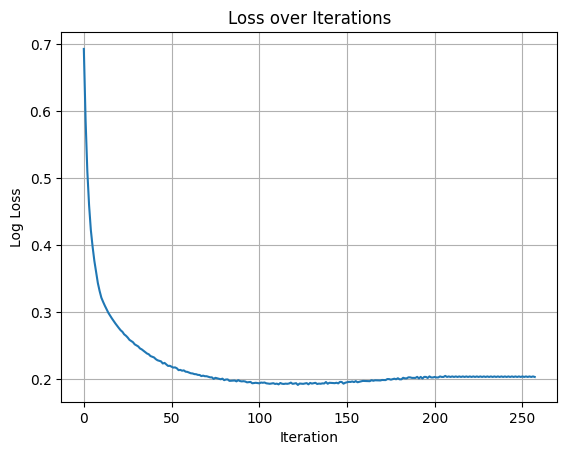

In [168]:
import matplotlib.pyplot as plt

plt.plot(losslist_quant)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


OBSERVATION -

When we used 2 bits per attribute, it started diverging. Makes sense as there are only 4 values it can map to, thus it is very distorted, like stepping in the dark pretty much. So the direction of movement gets messed up and we get a diverging graph. Same with using 3 for each.

HOW TO COUNTER THE ABOVE?

When I used 4 bits it dipped until a certain point, then increased a bit a became stagnant. What we observed was that the threshold wasn't getting triggered, it was hovering around.
So for that case I increased log loss difference threshold to 1e-5 from 1e-6.

When I used 10 per attribute it is ok, converging for our originally intended thresholds.

In [169]:
error_qgd = theta_server - theta_true.reshape(-1, 1)
l2_norm_qgd = np.linalg.norm(error_qgd)
print("L2 norm of error vector using second difference gradient model:", l2_norm_qgd)

L2 norm of error vector using second difference gradient model: 1.0498454089137872


In [170]:
results = {}

#assume minimum we will give 4 bits to each attribute and we have a budget of 100 attributes total

bit_allocations = {
    "uniform": [10] * 10,
    "front_heavy": [12, 12, 11, 9, 8, 8, 8, 8, 7, 7],
    "middle_heavy": [6, 7, 10, 12, 13, 12, 10, 7, 6, 7],
    "back_heavy": [5, 5, 6, 7, 8, 8, 10, 12, 19, 20],
    "slight_priority": [9, 9, 9, 10, 10, 10, 11, 11, 10, 11],
    "single_focus": [4, 4, 4, 4, 4, 4, 4, 4, 4, 64]
}

for name, bit_alloc in bit_allocations.items():
    print(f"Running {name} allocation...")
    theta, losses, epochs = train_with_quantization(X_noisy, y_noisy, bit_alloc = bit_alloc)
    results[name] = {
        "theta": theta,
        "losses": losses,
        "epochs": epochs,
        "final_loss": losses[-1] if losses else None
    }


Running uniform allocation...
Epoch 1, Loss: 0.577628230, Prev_loss: 0.693147181
Epoch 2, Loss: 0.503451597, Prev_loss: 0.577628230
Epoch 3, Loss: 0.453063527, Prev_loss: 0.503451597
Epoch 4, Loss: 0.416606886, Prev_loss: 0.453063527
Epoch 5, Loss: 0.389013316, Prev_loss: 0.416606886
Epoch 6, Loss: 0.367297709, Prev_loss: 0.389013316
Epoch 7, Loss: 0.349701384, Prev_loss: 0.367297709
Epoch 8, Loss: 0.335108899, Prev_loss: 0.349701384
Epoch 9, Loss: 0.322792495, Prev_loss: 0.335108899
Epoch 10, Loss: 0.312216632, Prev_loss: 0.322792495
Epoch 11, Loss: 0.303021304, Prev_loss: 0.312216632
Epoch 12, Loss: 0.294910832, Prev_loss: 0.303021304
Epoch 13, Loss: 0.287688288, Prev_loss: 0.294910832
Epoch 14, Loss: 0.281242448, Prev_loss: 0.287688288
Epoch 15, Loss: 0.275429808, Prev_loss: 0.281242448
Epoch 16, Loss: 0.270170305, Prev_loss: 0.275429808
Epoch 17, Loss: 0.265367231, Prev_loss: 0.270170305
Epoch 18, Loss: 0.260974473, Prev_loss: 0.265367231
Epoch 19, Loss: 0.256926133, Prev_loss: 0.2

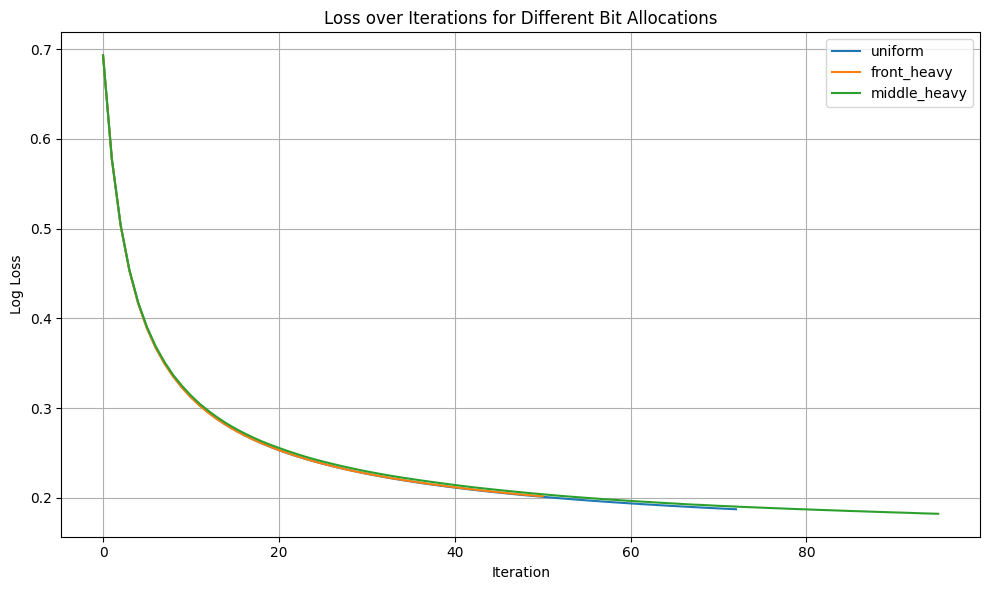

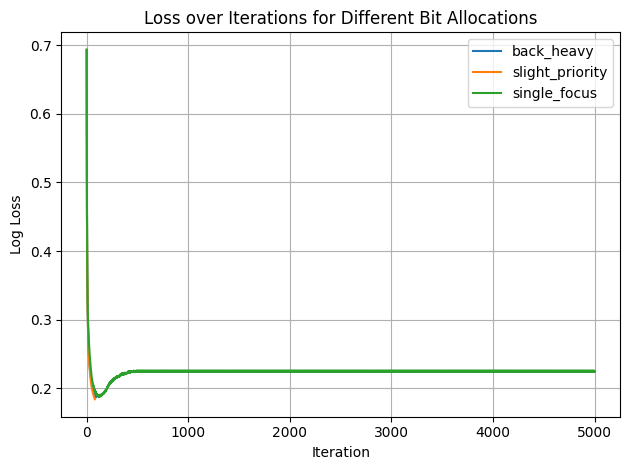

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
i = 1
for m in bit_allocations.keys():
    plt.plot(results[m]["losses"], label=m)
    if i % 3== 0:
      plt.xlabel('Iteration')
      plt.ylabel('Log Loss')
      plt.title('Loss over Iterations for Different Bit Allocations')
      plt.legend()
      plt.grid(True)
      plt.tight_layout()
      plt.show()
    i += 1


# **QUANTIZED GRADIENT DESCENT DYNAMIC_SECOND ORDER GRADIENT CHANGE IMPORTANCE**

In [172]:
import numpy as np

def importance_based_allocation_budgeted(grad, prev_grad, prev_prev_grad, total_budget=100, min_bits=2, epsilon=1e-8):
    delta = grad - prev_grad
    delta_prev = prev_grad - prev_prev_grad
    second_order = np.abs(delta - delta_prev)
    first_order = np.abs(delta) + epsilon
    ratio = second_order / first_order

    # Normalize importance to sum to 1
    importance = ratio / (np.sum(ratio) + epsilon)

    # Initial raw allocation (float bits per feature)
    raw_alloc = importance * total_budget

    # Enforce min_bits
    bit_alloc = np.maximum(raw_alloc, min_bits)

    # If sum > budget due to enforcing min_bits, adjust
    excess = np.sum(bit_alloc) - total_budget
    if excess > 0:
        # Scale down the adjustable part
        adjustable = bit_alloc - min_bits
        scale = (np.sum(adjustable) - excess) / (np.sum(adjustable) + epsilon)
        bit_alloc = min_bits + adjustable * max(scale, 0)

    # Final bit allocation (integer)
    return np.round(bit_alloc.flatten()).astype(int).tolist()


In [173]:
import matplotlib.pyplot as plt

attribute_dict = {}

def store_bit_allocation(bit_allocation):
  global attribute_dict
  for i in range(len(bit_allocation)):
    attribute_dict[f"Attribute {i+1}"].append(bit_allocation[i])



def encode_gradient(gradient, bit_alloc):
    encoded_bits = ''
    for g, bits in zip(gradient, bit_alloc):
        #print(bits)
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        q_index = int(round((g + 1) / step_size))  # Find the quantized index
        q_index = min(num_levels - 1, max(0, q_index))  # Clip index to be within bounds
        bin_str = format(q_index, f'0{bits}b')  # Convert index to binary string
        encoded_bits += bin_str  # Concatenate to form final encoded string
    return encoded_bits

# Decoding Function: Convert the encoded gradient back
def decode_gradient(encoded_bits, bit_alloc):
    decoded_grad = []
    idx = 0
    for bits in bit_alloc:
        seg = encoded_bits[idx:idx + bits]
        idx += bits
        q_index = int(seg, 2)  # Convert binary string back to integer
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        val = -1 + q_index * step_size + (step_size / 2.0)  # Decode back to original value
        decoded_grad.append(val)
    return decoded_grad


def train_with_quantization_dynamic(X, y, lr=0.1, max_epochs=5000, tol=1e-9, bit_alloc=None):
    global attribute_dict
    y = y.reshape(-1, 1)
    losses = []

    n_samples, n_features = X.shape
    theta_client = np.zeros((n_features, 1))  # Client's theta
    theta_server = np.zeros((n_features, 1))  # Server's theta

    prev_grad = np.zeros_like(theta_client)   #initialize as all zeroes
    prev_prev_grad = np.zeros_like(theta_client)
    prev_loss = None    #so that we dont compute change in log loss in the first iteration
    stagnant_steps = 0
    attribute_dict = {}
    for i in range(n_features):
      attribute_dict[f"Attribute {i+1}"] = []

    for epoch in range(max_epochs):
        # Client-side: predict, compute gradient
        y_pred = predict_probs(X, theta_client)
        loss = log_loss(y, y_pred)
        grad = compute_gradient(X, y, y_pred)

        # Quantize and encode the gradient (flatten to 1D)
        #encoded = encode_gradient(grad.flatten(), bit_alloc)
        # Dynamically compute bit allocation based on second-order gradient change
        bit_alloc = importance_based_allocation_budgeted(
            grad=grad,
            prev_grad=prev_grad,
            prev_prev_grad=prev_prev_grad,
            total_budget=100,   # You can change this
            min_bits=4
        )
        store_bit_allocation(bit_alloc)

        # Quantize and encode the gradient
        encoded = encode_gradient(grad.flatten(), bit_alloc)


        # Simulate transmission to server (bit_alloc + encoded)
        # Server decodes
        decoded_grad = np.array(decode_gradient(encoded, bit_alloc)).reshape(-1, 1)

        # Server updates theta
        theta_server = update_theta(theta_server, decoded_grad, lr)

        # Client also updates theta (for consistency)
        theta_client = update_theta(theta_client, decoded_grad, lr)

        # Track loss
        losses.append(loss)

        # Print every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")

        # Convergence check
        if epoch >= 2 and prev_loss is not None:
            second_diff = np.linalg.norm(decoded_grad - 2 * prev_grad + prev_prev_grad)
            if abs(loss - prev_loss) < 1e-6:
                stagnant_steps += 1
                print("stagnant", stagnant_steps)
            else:
                stagnant_steps = 0

            if stagnant_steps >= 50 or second_diff < tol:
              if stagnant_steps >= 50:
                print("Log loss stagnant")
              else:
                print("Difference in difference of gradient threshold reached ")

              print(f"Converged at epoch {epoch}")
              break

        # Update previous gradients and loss
        prev_prev_grad = prev_grad
        prev_grad = decoded_grad
        prev_loss = loss

    return theta_server, losses, epoch, attribute_dict


In [174]:
theta_dynamic, losses_dynamic, epochs_dynamic, attribute_bits = train_with_quantization_dynamic(X_noisy,y_noisy)
results["dynamic"] = {
    "theta": theta_dynamic,
    "losses": losses_dynamic,
    "epochs": epochs_dynamic,
    "final_loss": losses_dynamic[-1] if losses_dynamic else None,
}


Epoch 0, Loss: 0.693147
Epoch 10, Loss: 0.315376
Epoch 20, Loss: 0.260950
Epoch 30, Loss: 0.235071
Epoch 40, Loss: 0.222859
Epoch 50, Loss: 0.215126
Epoch 60, Loss: 0.208327
Epoch 70, Loss: 0.201633
Epoch 80, Loss: 0.198846
Epoch 90, Loss: 0.195947
Epoch 100, Loss: 0.193793
Epoch 110, Loss: 0.190942
Epoch 120, Loss: 0.189065
Epoch 130, Loss: 0.190877
Epoch 140, Loss: 0.186177
Epoch 150, Loss: 0.190962
Epoch 160, Loss: 0.184411
Epoch 170, Loss: 0.181761
Epoch 180, Loss: 0.180870
Epoch 190, Loss: 0.177994
Epoch 200, Loss: 0.176659
Epoch 210, Loss: 0.175943
Epoch 220, Loss: 0.176374
Epoch 230, Loss: 0.175235
Epoch 240, Loss: 0.176204
Epoch 250, Loss: 0.178174
Epoch 260, Loss: 0.175004
Epoch 270, Loss: 0.173502
Epoch 280, Loss: 0.177070
Epoch 290, Loss: 0.173869
Epoch 300, Loss: 0.173442
Epoch 310, Loss: 0.174245
Epoch 320, Loss: 0.173595
Epoch 330, Loss: 0.170792
Epoch 340, Loss: 0.173097
Epoch 350, Loss: 0.173460
Epoch 360, Loss: 0.172799
Epoch 370, Loss: 0.173502
Epoch 380, Loss: 0.1746

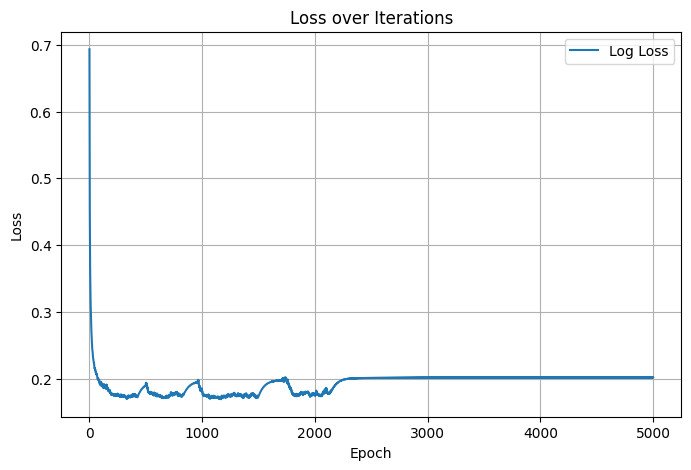

In [176]:
# Plot loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(losses_dynamic, label='Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.legend()
plt.show()

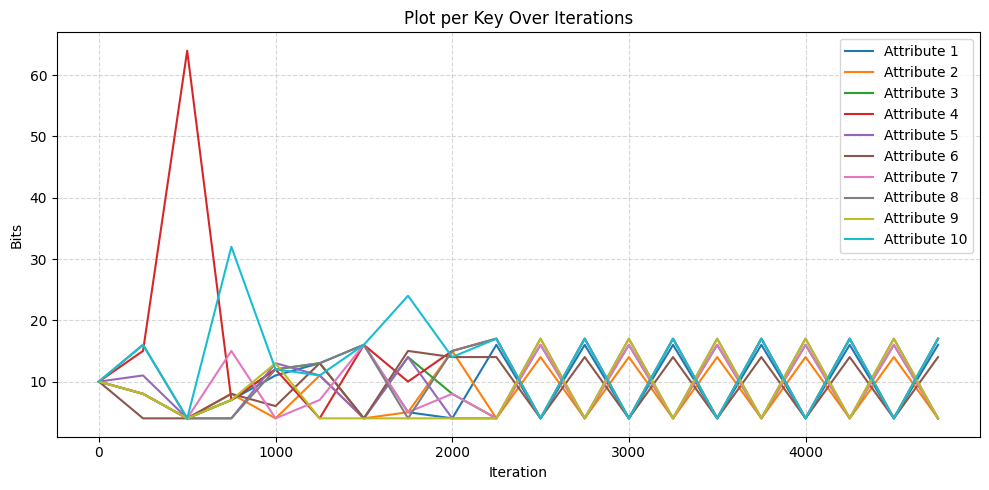

In [177]:
import matplotlib.pyplot as plt
def plot_dict_of_lists(data_dict, title="Plot per Key Over Iterations", xlabel="Iteration", ylabel="Bits"):
    plt.figure(figsize=(10, 5))

    for key, values in data_dict.items():
        downsampled_values = values[::250]  # Take every 100th value
        iterations = list(range(0, len(values), 250))
        plt.plot(iterations, downsampled_values, label=str(key))


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_dict_of_lists(attribute_bits)


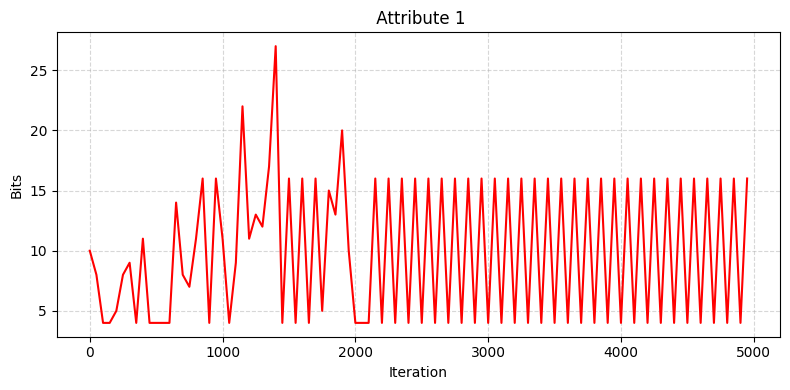

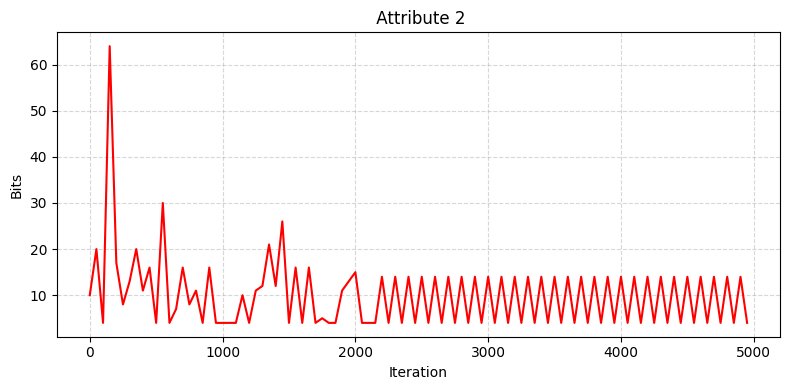

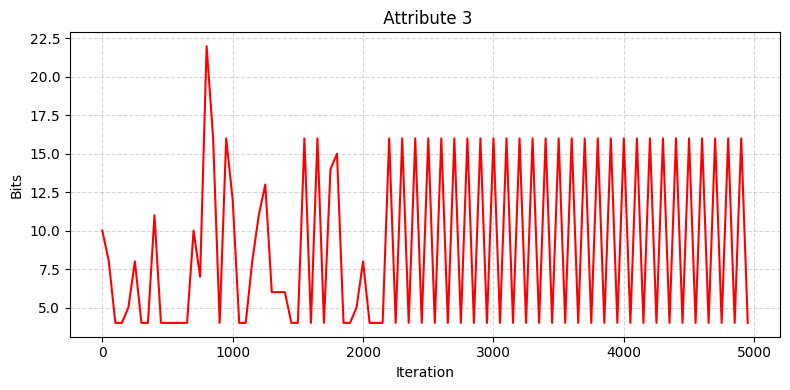

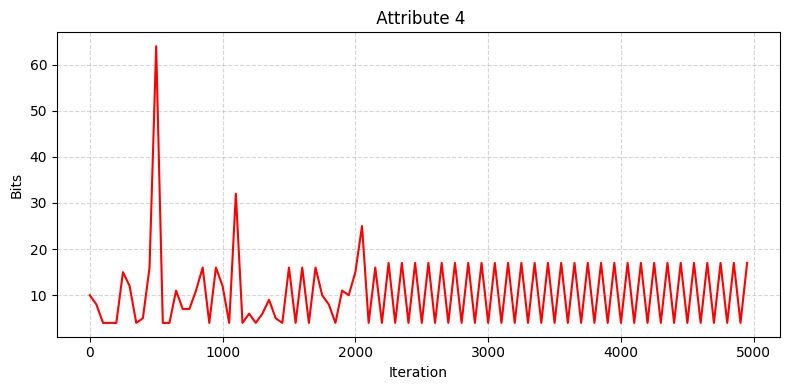

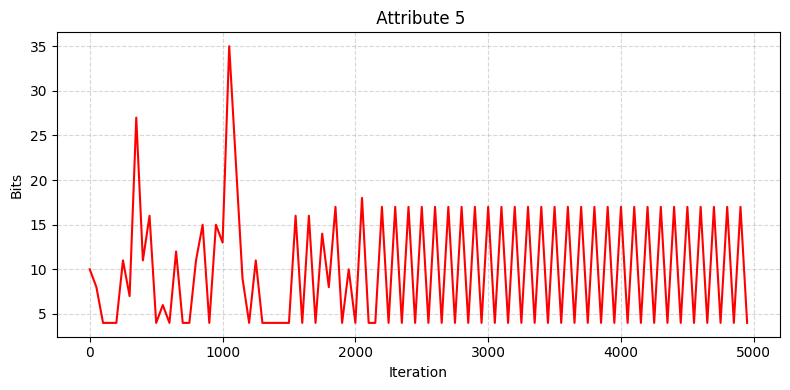

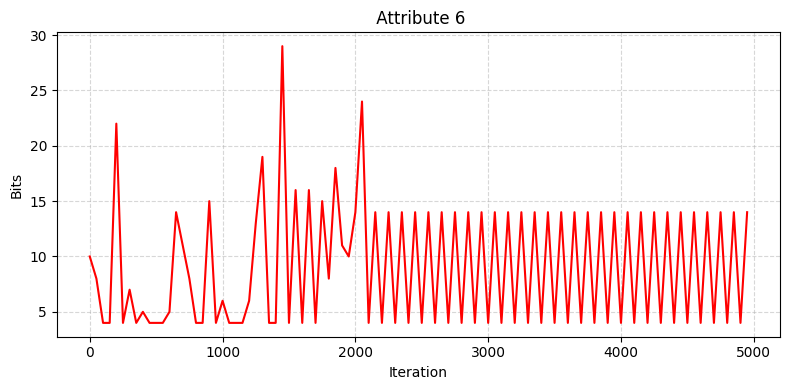

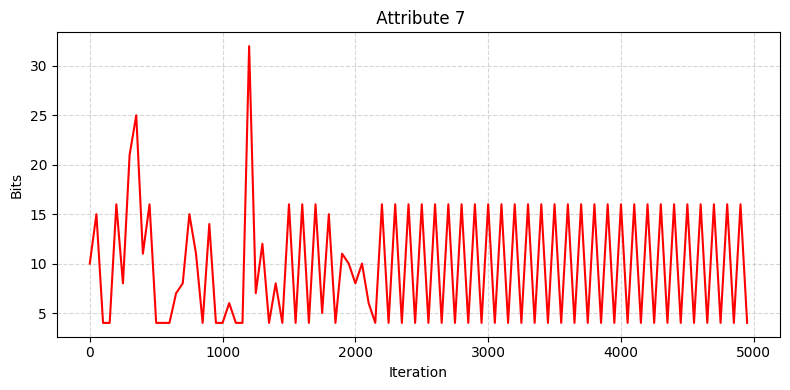

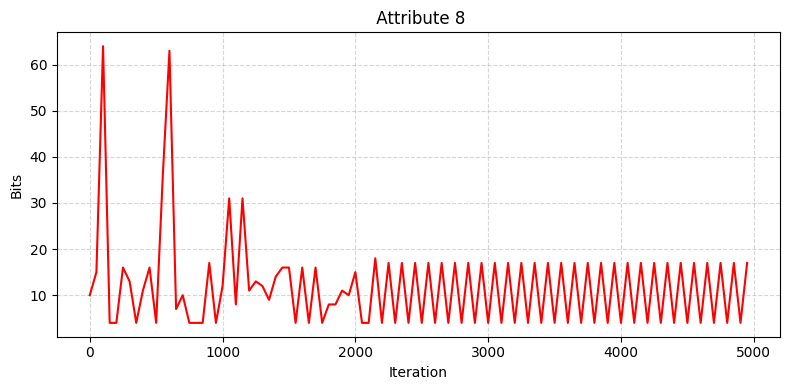

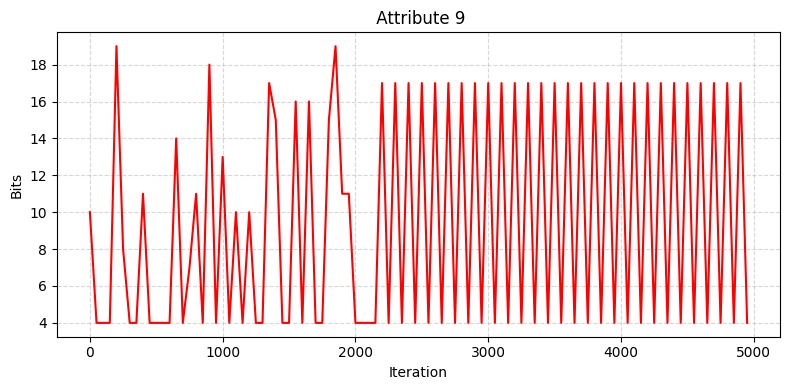

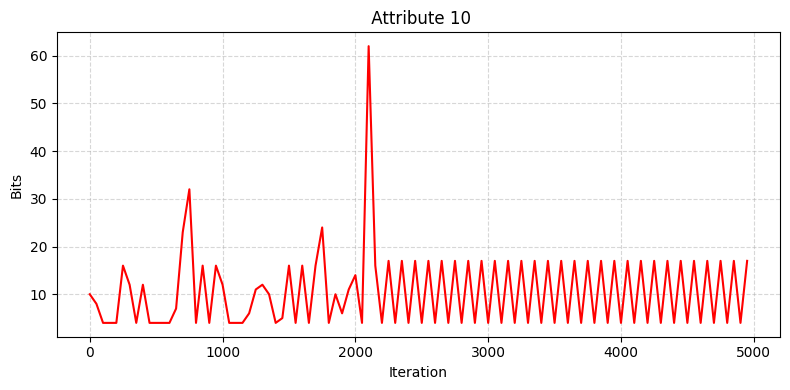

In [178]:
import matplotlib.pyplot as plt

def plot_each_attribute_separately(data_dict, title_prefix="", xlabel="Iteration", ylabel="Bits"):
    for key, values in data_dict.items():
        downsampled_values = values[::50]  # Every 100th value
        iterations = list(range(0, len(values), 50))

        plt.figure(figsize=(8, 4))
        plt.plot(iterations, downsampled_values, color='red')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(f"{title_prefix} {key}")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# Example usage
plot_each_attribute_separately(attribute_bits)


# **INFER STATIC VS DYNAMIC**

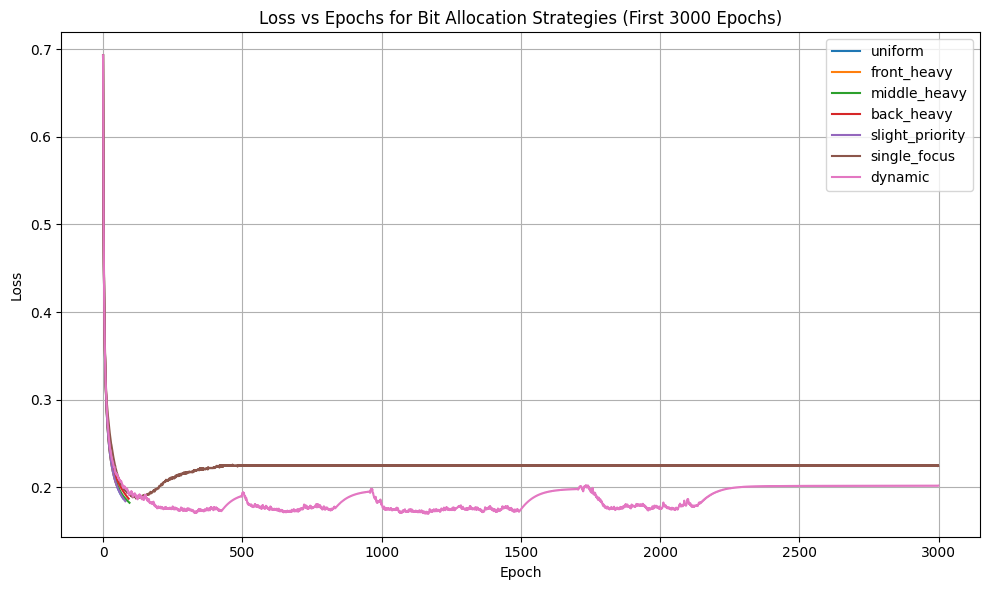

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, res in results.items():
    losses = res["losses"]
    if losses:
        plt.plot(losses[:3000], label=name)  # Slice to 3000 epochs max

plt.title("Loss vs Epochs for Bit Allocation Strategies (First 3000 Epochs)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Comparing final Theta values

In [104]:
for name, res in results.items():
    print(f"{name:15s} \n| Final θ: \n{res['theta']}")


uniform         
| Final θ: 
[[-0.18623047]
 [ 0.66982422]
 [ 0.34404297]
 [ 0.14072266]
 [-0.50966797]
 [-0.50576172]
 [-0.66083984]
 [ 0.53740234]
 [ 0.14873047]
 [ 0.30556641]]
front_heavy     
| Final θ: 
[[-0.16228027]
 [ 0.58869629]
 [ 0.30200195]
 [ 0.12167969]
 [-0.44960937]
 [-0.44570313]
 [-0.58320313]
 [ 0.46679687]
 [ 0.11640625]
 [ 0.25703125]]
middle_heavy    
| Final θ: 
[[-0.228125  ]
 [ 0.7015625 ]
 [ 0.36914062]
 [ 0.15244141]
 [-0.54509277]
 [-0.54082031]
 [-0.70644531]
 [ 0.5671875 ]
 [ 0.146875  ]
 [ 0.3125    ]]
back_heavy      
| Final θ: 
[[-0.240625  ]
 [ 0.653125  ]
 [ 0.3328125 ]
 [ 0.13984375]
 [-0.53007813]
 [-0.52617188]
 [-0.68349609]
 [ 0.55734863]
 [ 0.15610104]
 [ 0.31797228]]
slight_priority 
| Final θ: 
[[-0.19433594]
 [ 0.69199219]
 [ 0.35488281]
 [ 0.14599609]
 [-0.52802734]
 [-0.52373047]
 [-0.68354492]
 [ 0.55727539]
 [ 0.15400391]
 [ 0.31743164]]
single_focus    
| Final θ: 
[[-0.75      ]
 [ 1.7       ]
 [ 0.7625    ]
 [ 0.175     ]
 [-1.6625  

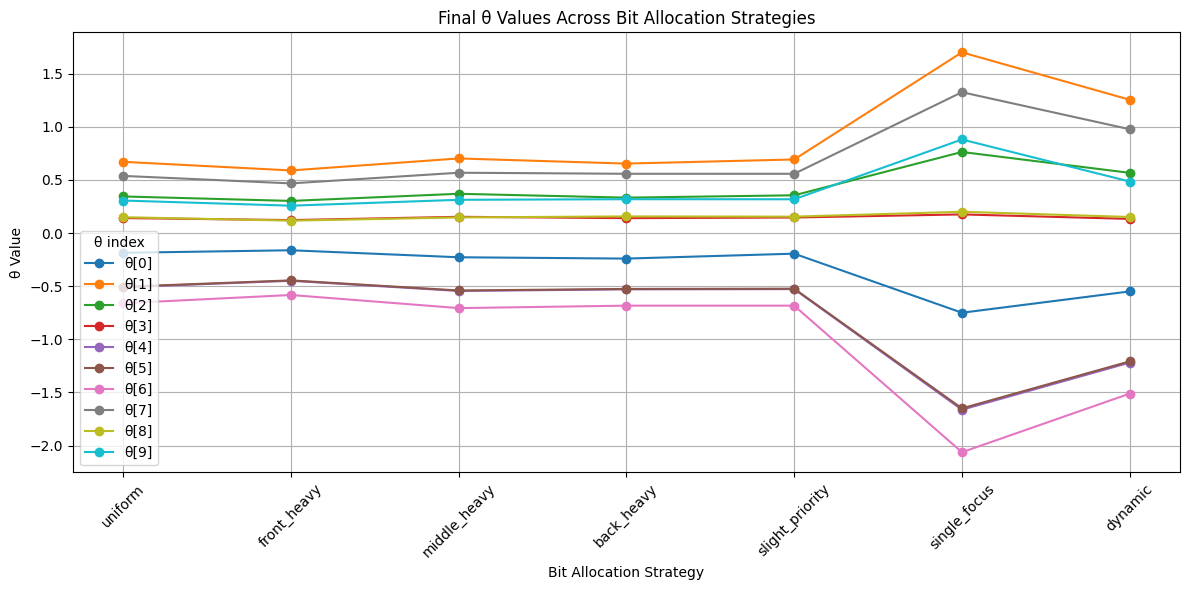

In [103]:
import numpy as np
import matplotlib.pyplot as plt

theta_labels = list(results.keys())  # e.g., ["uniform", ..., "dynamic"]
theta_matrix = np.array([res["theta"] for res in results.values()])  # shape: (strategies, dimensions)

x = np.arange(theta_matrix.shape[0])  # 0, 1, 2, ..., num_strategies-1

plt.figure(figsize=(12, 6))

# Loop over each θ dimension
for i in range(theta_matrix.shape[1]):
    plt.plot(x, theta_matrix[:, i], marker='o', label=f'θ[{i}]')

plt.xticks(x, theta_labels, rotation=45)
plt.title("Final θ Values Across Bit Allocation Strategies")
plt.xlabel("Bit Allocation Strategy")
plt.ylabel("θ Value")
plt.legend(title="θ index")
plt.grid(True)
plt.tight_layout()
plt.show()


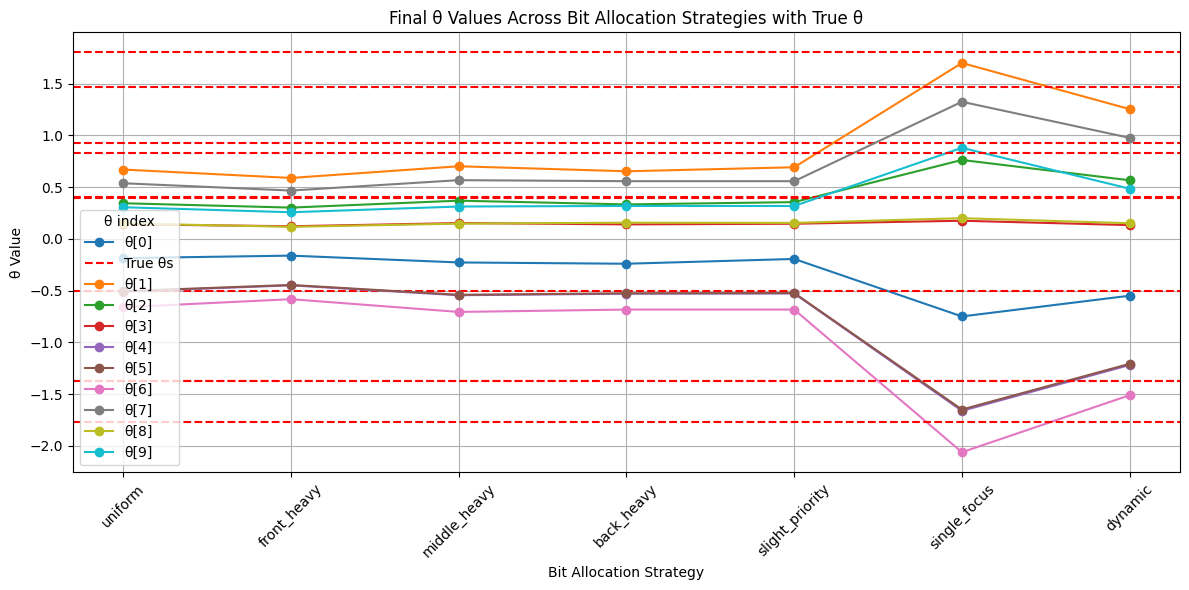

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming true_theta is an array of the true values for each dimension
true_theta = np.array(True_Weight)  # example true theta

theta_labels = list(results.keys())  # e.g., ["uniform", ..., "dynamic"]
theta_matrix = np.array([res["theta"] for res in results.values()])  # shape: (strategies, dimensions)

x = np.arange(theta_matrix.shape[0])  # 0, 1, 2, ..., num_strategies-1

plt.figure(figsize=(12, 6))

# Loop over each θ dimension
for i in range(theta_matrix.shape[1]):
    plt.plot(x, theta_matrix[:, i], marker='o', label=f'θ[{i}]')

    # Plot the true θ value for this dimension (as a horizontal line)
    plt.axhline(true_theta[i], color='red', linestyle='--', label=f'True θs' if i == 0 else "")

plt.xticks(x, theta_labels, rotation=45)
plt.title("Final θ Values Across Bit Allocation Strategies with True θ")
plt.xlabel("Bit Allocation Strategy")
plt.ylabel("θ Value")
plt.legend(title="θ index")
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
import numpy as np

true_theta = np.array(True_Weight)  # ensure it's a NumPy array
l2_errors = {}

for name, res in results.items():
    final_theta = np.array(res["theta"])
    error = np.linalg.norm(final_theta - true_theta)  # L2 norm
    l2_errors[name] = error

# Optionally print it nicely
for name, error in l2_errors.items():
    print(f"{name:15s} | L2 Error: {error:.8f}")


uniform         | L2 Error: 2.39256440
front_heavy     | L2 Error: 2.56750034
middle_heavy    | L2 Error: 2.30539056
back_heavy      | L2 Error: 2.36048317
slight_priority | L2 Error: 2.34322871
single_focus    | L2 Error: 0.67490652
dynamic         | L2 Error: 1.02246391


# **ENCODING THE DYNAMIC BITS _ ELIAS CODING**

**NOW HOW DO WE FIT IT INTO THE BIT BUDGET?? HERE ARE SOME IDEAS WE BRAINSTORMED -**

1) In the very first iteration the client sends the bit message to the server, but it will only convey length of our x vector. Then the subsequent iterations, we shall send elias + gradient only. Since server knows how many attributes are there, it can decode the elias+gradient binary message.

2) First method loses bits in the first iteration a lot possibly. So we could instead use the remaining unused bits for elias + gradient. So first iteration we send length_conveyer+elias+gradient then following iterations we shall send elias+gradient since length has been conveyed.


In [134]:
#elias code generate.
def elias_gamma_encode(n):
    if n <= 0:
        raise ValueError("Elias gamma code only works for positive integers.")
    binary = bin(n)[2:]
    prefix = '0' * (len(binary) - 1)
    return prefix + binary

#generate gradient's encoding
def encode_gradient(gradient, bit_alloc):
    encoded_bits = ''
    for g, bits in zip(gradient, bit_alloc):
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        q_index = int(round((g + 1) / step_size))
        q_index = min(num_levels - 1, max(0, q_index))
        bin_str = format(q_index, f'0{bits}b')
        encoded_bits += bin_str
    return encoded_bits

#full message 8 bits + elias + gradient written as a binary string

#first 8 bits are used to convey length of our bit allocation list, so we will decode using elias logic for those many numbers.
#eg - 00000011 means length is 3.

def encode_full_message(gradient, bit_alloc):
    bit_alloc_len = len(bit_alloc)
    # 4-bit header for bit_alloc length (so max  dims)
    header = format(bit_alloc_len, '04b')

    # Elias gamma encode the bit allocation
    elias_encoded_alloc = ''.join([elias_gamma_encode(b) for b in bit_alloc])

    # Encode gradient using given bit_alloc
    encoded_grad = encode_gradient(gradient, bit_alloc)

    # Full message
    return header + elias_encoded_alloc + encoded_grad


#HERE WE START THE DECODING OF THE ABOVE GENERATED MESSAGE STRING



def elias_gamma_decode(s, index):
    """Decodes Elias gamma code starting from bit `index` in string `s`."""
    zero_count = 0
    while index < len(s) and s[index] == '0':
        zero_count += 1
        index += 1
    if index + zero_count >= len(s):
        raise ValueError("Elias gamma decoding failed: not enough bits.")
    binary = '1' + s[index + 1 : index + zero_count + 1]
    decoded = int(binary, 2)
    return decoded, index + zero_count + 1

def decode_gradient(encoded_str):
    index = 0

    # 1. Read header (8 bits for number of dimensions)
    n = int(encoded_str[index:index + 4], 2)
    index += 4

    # 2. Decode bit allocations using Elias gamma code
    bit_alloc = []
    for _ in range(n):
        val, index = elias_gamma_decode(encoded_str, index)
        bit_alloc.append(val)

    # 3. Decode quantized gradients using bit allocations
    decoded_grad = []
    for bits in bit_alloc:
        bin_str = encoded_str[index:index + bits]
        if len(bin_str) < bits:
            raise ValueError("Insufficient bits for decoding gradient.")
        q_index = int(bin_str, 2)
        num_levels = 2 ** bits
        step_size = 2.0 / num_levels
        value = q_index * step_size - 1  # map index back to [-1, 1]
        decoded_grad.append(value)
        index += bits

    return bit_alloc, decoded_grad

In [135]:
import numpy as np

# Sample gradient vector
gradient = np.array([0.5, -0.2, 0.3])

# Example bit allocation for each dimension of the gradient
bit_alloc = [4, 6, 5]  # For example, use 4 bits for the first, 6 for the second, and 5 for the third component

# Encoding the gradient and bit allocation
encoded_message = encode_full_message(gradient, bit_alloc)

print("Encoded Message:", encoded_message)


Encoded Message: 0011001000011000101110001101010101


In [136]:
# Decoding the encoded message
bit_alloc_decoded, decoded_gradient = decode_gradient(encoded_message)

print("Decoded Bit Allocation:", bit_alloc_decoded)
print("Decoded Gradient:", decoded_gradient)


Decoded Bit Allocation: [4, 6, 5]
Decoded Gradient: [0.5, -0.1875, 0.3125]


In [137]:
# Compare original gradient with decoded gradient
print("Original Gradient:", gradient)
print("Decoded Gradient:", decoded_gradient)

# Check if there is a significant difference between the original and decoded gradients
print("Difference between original and decoded gradient:", np.abs(gradient - decoded_gradient))


Original Gradient: [ 0.5 -0.2  0.3]
Decoded Gradient: [0.5, -0.1875, 0.3125]
Difference between original and decoded gradient: [0.     0.0125 0.0125]


**We can now encode a static bit allocation along with our gradient but for dynamic bit allocation, we have to keep changing the elias code according to change in the bit allocations but the problem arises because we have a bit budget that is fixed, Hence for.......**